**<span style='color: Blue; font-size: 36px; text-align: centre;'>Movie Recommendation System</span>**
***

### PROJECT OVERVIEW

Jaba Movie Shop endeavors to optimize user engagement and satisfaction through the implementation of a recommendation system. Jaba Movie Shop seeks to leverage on the extensive database of movieLens, to ensure that clients are paired with films that resonate with their preferences. The movies with high ratings are likely to be the mostly watched movies indicating customer satisfaction.


### Objective
The objective of this project is build a model that provides the top movie recommendations to a user, based on their ratings of other movies. By leveraging machine learning algorithms, collaborative filtering and content-based filtering the project aims to:

- Enhance user engagement by providing a platform where they get best recommendations based on their reviews, tags and ratings.
- Build a model that provides the top movie recommendations to a user.
- Enhance customer satisfaction.

### Business Problem
Jaba Movie Shop aims at optimizing user engagement and satisfaction through the implementation of a recommendation system leveraging the MovieLens dataset. The Movie Shop acknowledges the importance of understanding consumer preferences and viewing behaviors in the competitive entertainment landscape. By analyzing user ratings and preferences, it seeks to enhance content recommendations. Fostering a stronger client loyalty and solidifying its position as an entertainment provider.

### Data Understanding
The dataset used in this project was obtained from rom the GroupLens research lab at the University of Minnesota, which contains 100,000 user ratings. This makes it highly suitable for addressing the business problem at hand of developing a recommendation system. Contained in the dataset are:
- User Id and Movie Id - are unique identifiers that are consistent within the movieLen datasets.
- Timestamp - represent seconds since midnight Coordinated Universal Time (UTC) of January 1,1970.
- Rating - movie ratings by the different users made on a 5-star scale, with half-star increments.
- Tag - user generated metadata about different movies.
- Genre - is a pipe-separated list of different type of movies.
- tmdbId and imdbId - are unique identifier for movies.
- title - movie titles that are entered manually or imported from https://www.themoviedb.org/

### 1. Data Wrangling

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [155]:
links_df = pd.read_csv('links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [156]:
movies_df = pd.read_csv('movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [157]:
movies_df.shape

(9742, 3)

In [158]:
ratings_df = pd.read_csv('ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [159]:
ratings_df.shape

(100836, 4)

In [160]:
tags_df = pd.read_csv('tags.csv')
tags_df.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [161]:
tags_df.shape

(3683, 4)

In [162]:
merge_df = pd.merge(ratings_df, movies_df, on = 'movieId', how='inner')
merge_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [163]:
merge_df.shape

(100836, 6)

In [164]:
merge2_df = merge_df.merge(tags_df, on = 'userId', how='inner')

In [165]:
merge2_df.sample(2)

,userId,movieId_x,rating,timestamp_x,title,genres,movieId_y,tag,timestamp_y
2286701,474,953,3.5,1100292234,It's a Wonderful Life (1946),Children|Drama|Fantasy|Romance,7212.0,men in drag,1.138040e+09
2106325,506,61024,3.0,1424486988,Pineapple Express (2008),Action|Comedy|Crime,112552.0,music,1.424487e+09


In [166]:
merge2_df.duplicated().sum()

0

In [167]:
merge2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706485 entries, 0 to 4706484
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   userId       int64  
 1   movieId_x    int64  
 2   rating       float64
 3   timestamp_x  int64  
 4   title        object 
 5   genres       object 
 6   movieId_y    float64
 7   tag          object 
 8   timestamp_y  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 323.2+ MB


In [168]:
merge2_df.isnull().sum()

userId             0
movieId_x          0
rating             0
timestamp_x        0
title              0
genres             0
movieId_y      79619
tag            79619
timestamp_y    79619
dtype: int64

In [169]:
merge2_df.describe()

,userId,movieId_x,rating,timestamp_x,movieId_y,timestamp_y
count,4.706485e+06,4.706485e+06,4.706485e+06,4.706485e+06,4.626866e+06,4.626866e+06
mean,4.787287e+02,1.644222e+04,3.277587e+00,1.200256e+09,1.094841e+04,1.239233e+09
std,1.024621e+02,3.170939e+04,9.352906e-01,1.915970e+08,2.611919e+04,1.592218e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.281246e+08,1.000000e+00,1.137179e+09
25%,4.740000e+02,1.955000e+03,3.000000e+00,1.062076e+09,9.240000e+02,1.137207e+09
50%,4.740000e+02,4.127000e+03,3.500000e+00,1.108735e+09,2.871000e+03,1.138033e+09
75%,4.770000e+02,7.789000e+03,4.000000e+00,1.457845e+09,6.400000e+03,1.457846e+09
max,6.100000e+02,1.936090e+05,5.000000e+00,1.537799e+09,1.935650e+05,1.537099e+09


### Feature Engineering

In [170]:
merge2_df.head(2)

,userId,movieId_x,rating,timestamp_x,title,genres,movieId_y,tag,timestamp_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN


In [171]:
## separate year from title and creating a new column called year
merge2_df['year'] = merge2_df['title'].str.extract(r'\((\d{4})\)')

In [172]:
# Convert 'Year' column to datetime format
merge2_df['year'] = pd.to_datetime(merge2_df['year'], format='%Y')

In [173]:
# remove the year from title
merge2_df['title'] = merge2_df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

In [174]:
# Split genres into separate columns
genres_split = merge2_df['genres'].str.get_dummies(sep='|')
# Concatenate the original DataFrame with the split genres
merge2_df = pd.concat([merge2_df, genres_split], axis=1)

In [175]:
# Drop the no genres listed
#merge2_df.drop(columns=['genres'], inplace=True)
#merge2_df = merge2_df[~(merge2_df['genres']=='(no genres listed)')].reset_index(drop=True)
merge2_df.drop('(no genres listed)', axis=1, inplace=True)

In [176]:
# remove leading and ending whitespaces in title
merge2_df['title'] = merge2_df['title'].apply(lambda x: x.strip())

In [177]:
merge2_df.title.head()

0    Toy Story
1    Toy Story
2    Toy Story
3    Toy Story
4    Toy Story
Name: title, dtype: object

In [178]:
merge2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706485 entries, 0 to 4706484
Data columns (total 29 columns):
 #   Column       Dtype         
---  ------       -----         
 0   userId       int64         
 1   movieId_x    int64         
 2   rating       float64       
 3   timestamp_x  int64         
 4   title        object        
 5   genres       object        
 6   movieId_y    float64       
 7   tag          object        
 8   timestamp_y  float64       
 9   year         datetime64[ns]
 10  Action       int64         
 11  Adventure    int64         
 12  Animation    int64         
 13  Children     int64         
 14  Comedy       int64         
 15  Crime        int64         
 16  Documentary  int64         
 17  Drama        int64         
 18  Fantasy      int64         
 19  Film-Noir    int64         
 20  Horror       int64         
 21  IMAX         int64         
 22  Musical      int64         
 23  Mystery      int64         
 24  Romance      int64      

In [179]:
merge2_df.genres.isna().sum()

0

In [180]:
# add a new column 'rating_count'
rating_count = merge2_df.groupby('title')['rating'].count().reset_index().rename(columns={'rating':'rating_count'})
rating_count.head() 

,title,rating_count
0,'71,3
1,'Hellboy': The Seeds of Creation,1
2,'Round Midnight,2
3,'Salem's Lot,1
4,'Til There Was You,2


In [181]:
# calc the average rating
average_rating = merge2_df.groupby('title')['rating'].mean().reset_index().rename(columns={'rating':'average_rating'})
average_rating.head() 

,title,average_rating
0,'71,4.0
1,'Hellboy': The Seeds of Creation,4.0
2,'Round Midnight,3.5
3,'Salem's Lot,5.0
4,'Til There Was You,4.0


In [182]:
# merge rating count and average rating  
rating_count_avg = rating_count.merge(average_rating, on='title')
rating_count_avg.head()

,title,rating_count,average_rating
0,'71,3,4.0
1,'Hellboy': The Seeds of Creation,1,4.0
2,'Round Midnight,2,3.5
3,'Salem's Lot,1,5.0
4,'Til There Was You,2,4.0


In [183]:
# store cleaned data
df_clean = merge2_df.to_csv('movies_cleaned.csv', index=False)

### EDA

In [ ]:
#movie distribution by year
#correlation matrix
#genre analysis
#summary statistics
#rating distribution / average rating (top 10 rated movies)
#popularity by rating count
#rating by year

               userId  movieId_x    rating  timestamp_x  movieId_y  \
userId       1.000000  -0.112572 -0.320713     0.135053  -0.407503   
movieId_x   -0.112572   1.000000 -0.066567     0.488315   0.312392   
rating      -0.320713  -0.066567  1.000000    -0.207526   0.056925   
timestamp_x  0.135053   0.488315 -0.207526     1.000000   0.268683   
movieId_y   -0.407503   0.312392  0.056925     0.268683   1.000000   
timestamp_y  0.133456   0.458540 -0.254879     0.966750   0.289087   
Action      -0.015100   0.171299 -0.091118     0.232424   0.115585   
Adventure   -0.046050   0.107269 -0.020623     0.114297   0.108416   
Animation    0.031886   0.103759  0.000366     0.077073   0.059951   
Children     0.007542  -0.004311 -0.060278     0.010070   0.034158   
Comedy       0.036543  -0.091293 -0.165137    -0.045653  -0.034548   
Crime       -0.003548  -0.002494  0.041829     0.062533   0.003489   
Documentary -0.000008   0.033850  0.077479    -0.016605  -0.025864   
Drama       -0.01672

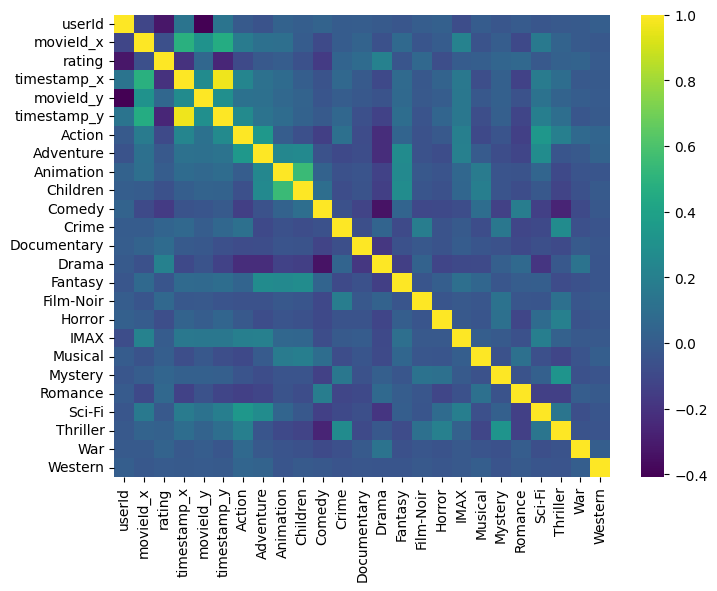

In [ ]:
# select numerical columns
nmeric_columns = merge2_df.select_dtypes(include=['number'])

# correlation matrix 
corr_matrix = nmeric_columns.corr()
print(corr_matrix)

#plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap='viridis')
plt.show()

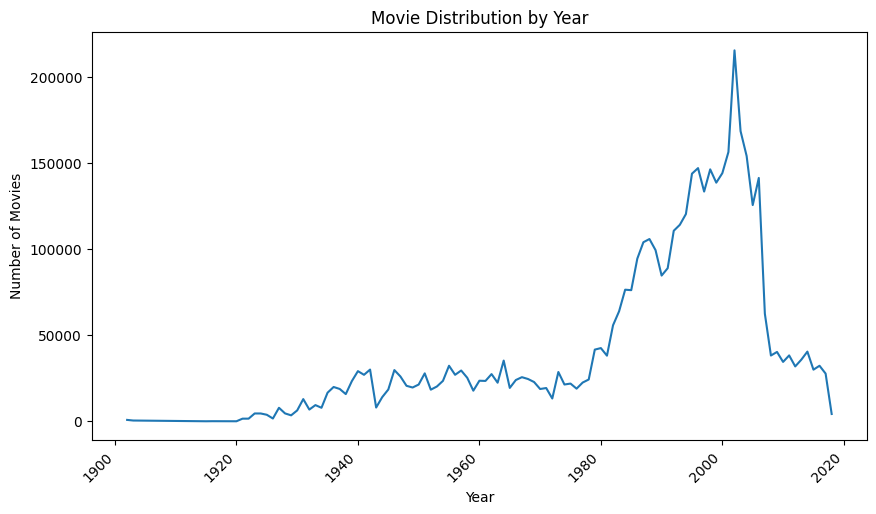

In [ ]:
# movie distribution by year
movie_count_by_year = merge2_df.groupby('year').size()
movie_count_by_year.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movie Distribution by Year')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#summary statistics
merge2_df.describe()

,userId,movieId_x,rating,timestamp_x,movieId_y,timestamp_y,year,Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4625687,4.626866e+06,4.626866e+06,4.626866e+06,...,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06
mean,4.816060e+02,1.642611e+04,3.273422e+00,1.200676e+09,1.094841e+04,1.239233e+09,1987-04-16 19:17:43.221354944,1.745644e-01,1.591481e-01,5.317530e-02,...,1.865799e-02,5.650304e-02,2.299397e-02,5.244133e-02,7.279636e-02,2.079282e-01,1.158168e-01,1.907594e-01,4.872391e-02,2.101422e-02
min,2.000000e+00,1.000000e+00,5.000000e-01,9.746663e+08,1.000000e+00,1.137179e+09,1902-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.740000e+02,1.962000e+03,3.000000e+00,1.063115e+09,9.240000e+02,1.137207e+09,1980-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.740000e+02,4.144000e+03,3.500000e+00,1.108390e+09,2.871000e+03,1.138033e+09,1994-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.770000e+02,7.810000e+03,4.000000e+00,1.457846e+09,6.400000e+03,1.457846e+09,2002-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.100000e+02,1.935870e+05,5.000000e+00,1.537355e+09,1.935650e+05,1.537099e+09,2018-01-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,9.823394e+01,3.167211e+04,9.324709e-01,1.910932e+08,2.611919e+04,1.592218e+08,NaN,3.795941e-01,3.658142e-01,2.243829e-01,...,1.353140e-01,2.308906e-01,1.498841e-01,2.229153e-01,2.598020e-01,4.058252e-01,3.200052e-01,3.928998e-01,2.152903e-01,1.434316e-01


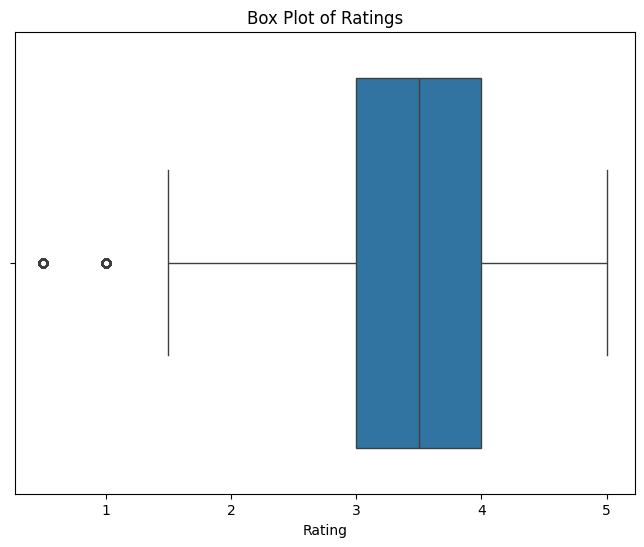

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', data=merge2_df)
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')
plt.show()

In [ ]:
# Display summary statistics
summary_stats = merge2_df.describe()
summary_stats

,userId,movieId_x,rating,timestamp_x,movieId_y,timestamp_y,year,Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4625687,4.626866e+06,4.626866e+06,4.626866e+06,...,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06,4.626866e+06
mean,4.816060e+02,1.642611e+04,3.273422e+00,1.200676e+09,1.094841e+04,1.239233e+09,1987-04-16 19:17:43.221354944,1.745644e-01,1.591481e-01,5.317530e-02,...,1.865799e-02,5.650304e-02,2.299397e-02,5.244133e-02,7.279636e-02,2.079282e-01,1.158168e-01,1.907594e-01,4.872391e-02,2.101422e-02
min,2.000000e+00,1.000000e+00,5.000000e-01,9.746663e+08,1.000000e+00,1.137179e+09,1902-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.740000e+02,1.962000e+03,3.000000e+00,1.063115e+09,9.240000e+02,1.137207e+09,1980-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.740000e+02,4.144000e+03,3.500000e+00,1.108390e+09,2.871000e+03,1.138033e+09,1994-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.770000e+02,7.810000e+03,4.000000e+00,1.457846e+09,6.400000e+03,1.457846e+09,2002-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.100000e+02,1.935870e+05,5.000000e+00,1.537355e+09,1.935650e+05,1.537099e+09,2018-01-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,9.823394e+01,3.167211e+04,9.324709e-01,1.910932e+08,2.611919e+04,1.592218e+08,NaN,3.795941e-01,3.658142e-01,2.243829e-01,...,1.353140e-01,2.308906e-01,1.498841e-01,2.229153e-01,2.598020e-01,4.058252e-01,3.200052e-01,3.928998e-01,2.152903e-01,1.434316e-01


In [ ]:
#rating distribution
rating_count.head()

,title,rating_count
0,'71,3
1,'Tis the Season for Love,4
2,"'burbs, The",2113
3,'night Mother,1507
4,(500) Days of Summer,1137


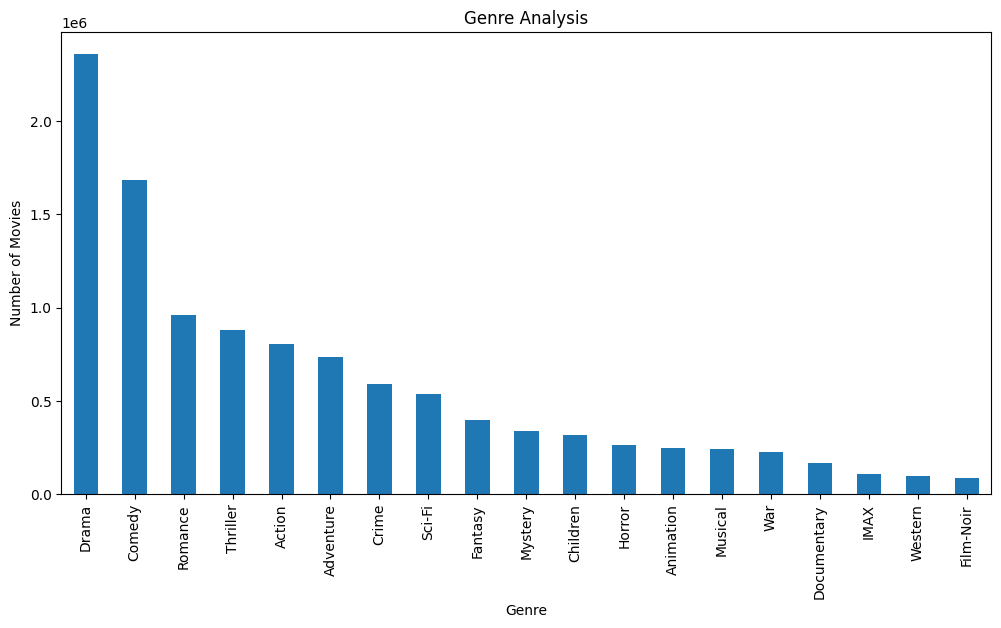

In [ ]:
# Count movies by genre and plot
genre_count = merge2_df.loc[:, 'Action':'Western'].sum().sort_values(ascending=False)
genre_count.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Genre Analysis')
plt.show()

In [ ]:
# Get top 10 rated movies
top_rated_movies = merge2_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print('Top 10 Rated Movies:')
print(top_rated_movies)


Top 10 Rated Movies:
title
Hannibal Rising                                     5.0
Bill Hicks: Revelations                             5.0
Perfect Plan, A (Plan parfait, Un)                  5.0
Room, The                                           5.0
Enchanted April                                     5.0
Match Factory Girl, The (Tulitikkutehtaan tyttö)    5.0
Departures (Okuribito)                              5.0
King of Hearts                                      5.0
English Vinglish                                    5.0
Unfaithfully Yours                                  5.0
Name: rating, dtype: float64


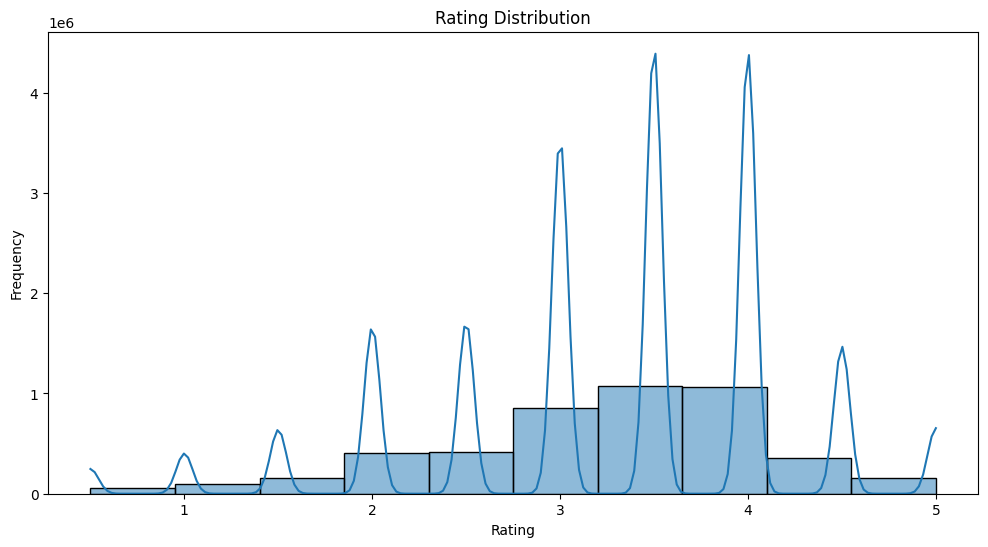

In [ ]:
# Plot rating distribution
plt.figure(figsize=(12, 6))
sns.histplot(merge2_df['rating'], bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.show()

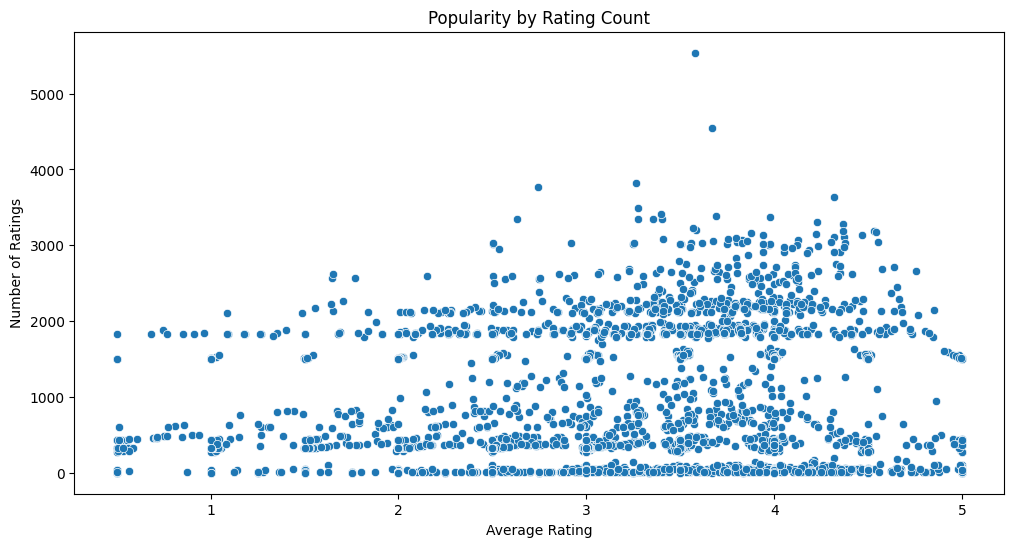

In [ ]:
#popularity by rating count
# Calculate average rating and number of ratings per movie
ratings_per_movie = merge2_df.groupby('title')['rating'].agg(['mean', 'count'])

# Plot popularity by rating count
plt.figure(figsize=(12, 6))
sns.scatterplot(y='count', x='mean', data=ratings_per_movie)
plt.ylabel('Number of Ratings')
plt.xlabel('Average Rating')
plt.title('Popularity by Rating Count')
plt.show()

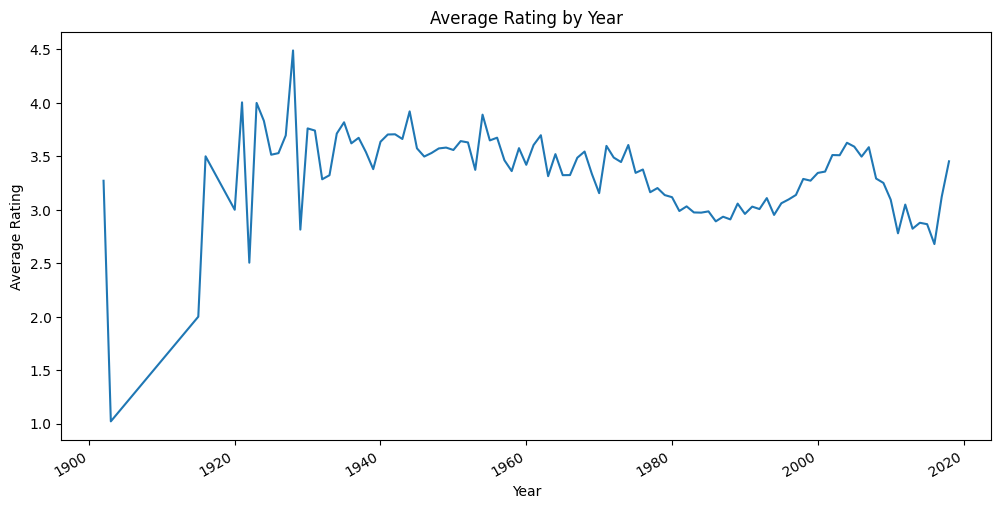

In [ ]:
# Calculate average rating by year
avg_rating_by_year = merge2_df.groupby('year')['rating'].mean()

# Plot rating by year
plt.figure(figsize=(12, 6))
avg_rating_by_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')
plt.show()

In [ ]:
# drop columns
merge2_df.drop(columns=['movieId_x', 'timestamp_x', 'timestamp_y', 'tag'], inplace=True)

In [ ]:
merge2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626866 entries, 0 to 4626865
Data columns (total 25 columns):
 #   Column       Dtype         
---  ------       -----         
 0   userId       int64         
 1   rating       float64       
 2   title        object        
 3   genres       object        
 4   movieId_y    int64         
 5   year         datetime64[ns]
 6   Action       int64         
 7   Adventure    int64         
 8   Animation    int64         
 9   Children     int64         
 10  Comedy       int64         
 11  Crime        int64         
 12  Documentary  int64         
 13  Drama        int64         
 14  Fantasy      int64         
 15  Film-Noir    int64         
 16  Horror       int64         
 17  IMAX         int64         
 18  Musical      int64         
 19  Mystery      int64         
 20  Romance      int64         
 21  Sci-Fi       int64         
 22  Thriller     int64         
 23  War          int64         
 24  Western      int64      

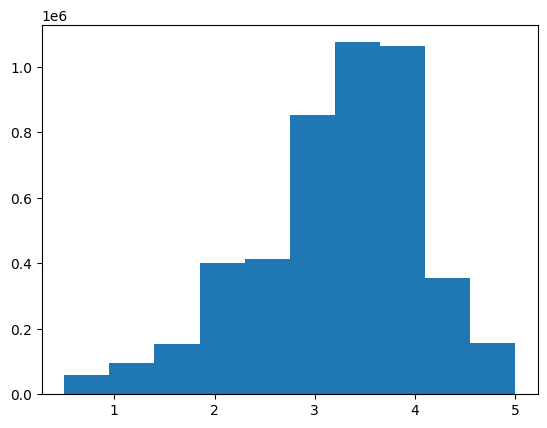

In [ ]:
# plotting a histogram on the ratings
plt.hist(merge2_df['rating'])
plt.show()

### Data Modelling

In [ ]:
# using Pearson Correlation
userid_pivot = merge2_df.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
userid_pivot.head()

title,'71,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...And Justice for All,00 Schneider - Jagd auf Nihil Baxter,10 Cent Pistol,10 Cloverfield Lane,...,Zootopia,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def recommend_movie(movie):
    movie_watched = userid_pivot[movie]
    similarity_with_other_movies = userid_pivot.corrwith(movie_watched)
    similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
    return similarity_with_other_movies.head()

In [ ]:
recommend_movie('Taxi Driver')

title
Paradise Lost: The Child Murders at Robin Hood Hills                    1.0
Taxi Driver                                                             1.0
Highlander: Endgame (Highlander IV)                                     1.0
Lady Vengeance (Sympathy for Lady Vengeance) (Chinjeolhan geumjassi)    1.0
Unstoppable                                                             1.0
dtype: float64

In [ ]:
rating_pivot = merge2_df.pivot_table(values='rating',columns='userId',index='movieId_y').fillna(0)
print('Shape of this pivot table :',rating_pivot.shape)
rating_pivot.head()

Shape of this pivot table : (1572, 58)


userId,2,7,18,21,49,62,63,76,103,106,...,520,533,537,543,567,573,599,600,606,610
movieId_y,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.245455,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,4.081967,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Encode categorical variables like genres
genres_encoder = LabelEncoder()
merge2_df['genres'] = genres_encoder.fit_transform(merge2_df['genres'])

# Dimensionality Reduction
X = merge2_df.pivot_table(index='userId', columns='movieId_y', values='rating').fillna(0)
# Apply SVD
svd = TruncatedSVD(n_components=100)  # Choose the number of components based on your dataset
X_svd = svd.fit_transform(X)

In [ ]:
# Model Training (You can use any recommendation algorithm)
# For simplicity, let's assume using the nearest neighbors algorithm
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(X_svd)

# Recommendation Generation
# Assuming userId 5 for recommendation
user_id = 5
user_row = X_svd[user_id - 1].reshape(1, -1)
distances, indices = model.kneighbors(user_row, n_neighbors=10)  # Number of neighbors to recommend
recommended_movie_ids = X.iloc[indices[0]].mean(axis=0).sort_values(ascending=False).index[:5]
recommended_movies = merge2_df[merge2_df['movieId_y'].isin(recommended_movie_ids)]['title'].unique()


In [ ]:
print("Recommended Movies:")
for movie in recommended_movies:
    print(movie)

Recommended Movies:
Toy Story
Usual Suspects, The
Star Wars: Episode IV - A New Hope
Forrest Gump
Jurassic Park
Batman
Silence of the Lambs, The
Mission: Impossible
Independence Day (a.k.a. ID4)
Star Wars: Episode V - The Empire Strikes Back
Apocalypse Now
Star Wars: Episode VI - Return of the Jedi
Psycho
Blues Brothers, The
Terminator, The
Back to the Future
Austin Powers: International Man of Mystery
L.A. Confidential
Rocky
Enemy of the State
Planet of the Apes
Star Wars: Episode I - The Phantom Menace
Superman
American Beauty
Gladiator
X-Men
Collateral
Departed, The
Postman, The (Postino, Il)
Aladdin
Beauty and the Beast
Gone with the Wind
English Patient, The
There's Something About Mary
Seven Samurai (Shichinin no samurai)
Life Is Beautiful (La Vita è bella)
Austin Powers: The Spy Who Shagged Me
Sixth Sense, The
Erin Brockovich
Bridget Jones's Diary
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone)
Apollo 13
True Lies
Terminator 2: Judgment Da